In [80]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree, metrics, datasets, model_selection
from matplotlib.colors import ListedColormap
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\Dasha\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['clf']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [124]:
X, y = datasets.make_classification(n_features=2, n_classes=3, n_informative=2, n_redundant=0, 
                            n_clusters_per_class=1, random_state=1)

cmp = ListedColormap(['red', 'blue', 'green'])
cmp_assessed = ListedColormap(['lightcoral', 'lightblue', 'lightgreen'])

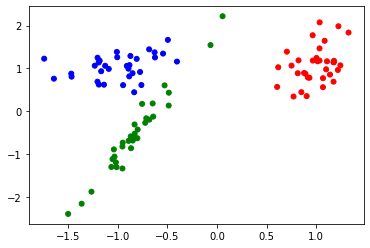

In [125]:
plt.scatter(x=X[:, 0], y=X[:, 1], c=y, cmap=cmp, s=25)

In [126]:
train_X, test_X, train_y, test_y = model_selection.train_test_split(X, y, test_size=0.3, random_state=0)

In [127]:
clf = tree.DecisionTreeClassifier(random_state=0)

# Разделяющая поверхность

In [55]:
def get_meshgrid(data, step=0.05, border=0.5): 
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

In [109]:
def plot_decision_surface(estimator, train_X, train_y, test_X, test_y, colors=cmp, color_a = cmp_assessed): 
    estimator.fit(train_X, train_y)
    plt.figure(figsize=(16, 6))
    pylab.subplot(1, 2, 1)
    xx, yy = get_meshgrid(train_X)
    mesh_predictions = np.array(clf.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
    plt.pcolormesh(xx, yy, mesh_predictions, cmap=color_a, shading='auto')
    plt.scatter(train_X[:, 0], train_X[:, 1], c=train_y, cmap=colors)
    plt.title(f'Accuracy score is {metrics.accuracy_score(train_y, estimator.predict(train_X)):.2f}')
    
    pylab.subplot(1, 2, 2)
    plt.pcolormesh(xx, yy, mesh_predictions, cmap=color_a, shading='auto')
    plt.scatter(test_X[:, 0], test_X[:, 1], c=test_y, cmap=colors)
    plt.title(f'Accuracy score is {metrics.accuracy_score(test_y, estimator.predict(test_X)):.2f}')
    

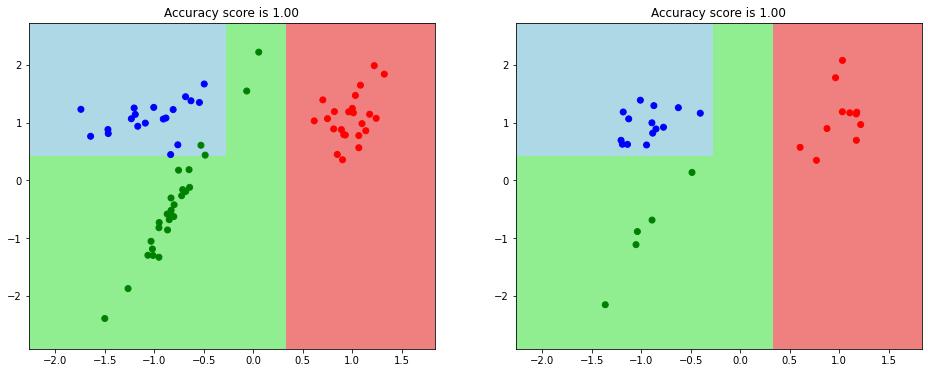

In [128]:
plot_decision_surface(clf, train_X, train_y, test_X, test_y)

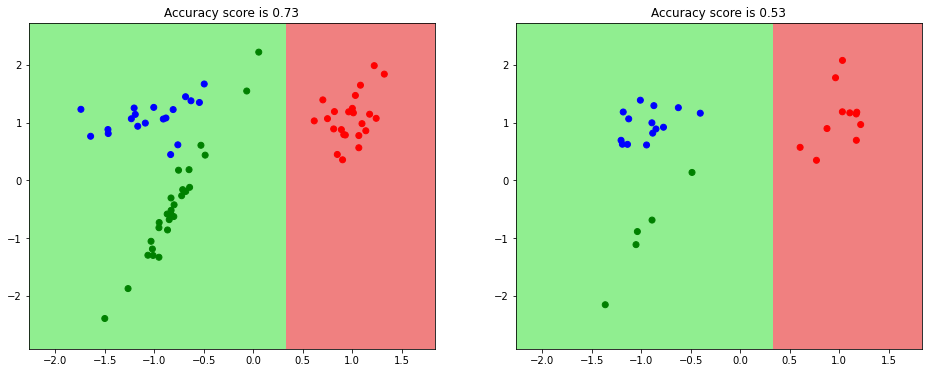

In [129]:
clf = tree.DecisionTreeClassifier(random_state=1, max_depth=1)
plot_decision_surface(clf, train_X, train_y, test_X, test_y)

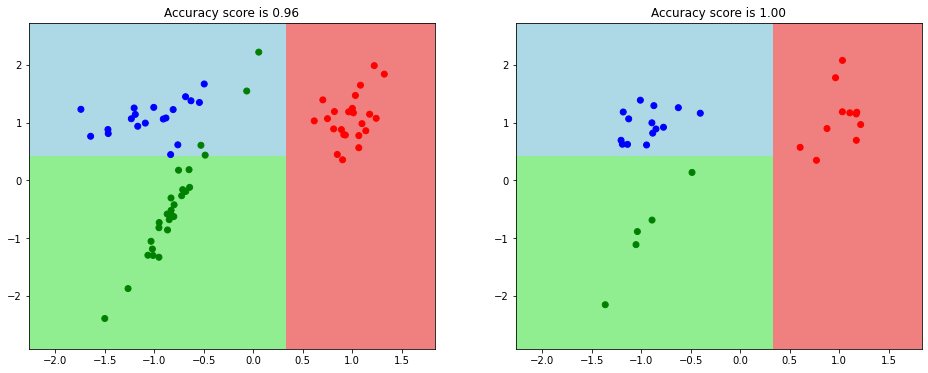

In [130]:
clf = tree.DecisionTreeClassifier(random_state=1, max_depth=2)
plot_decision_surface(clf, train_X, train_y, test_X, test_y)

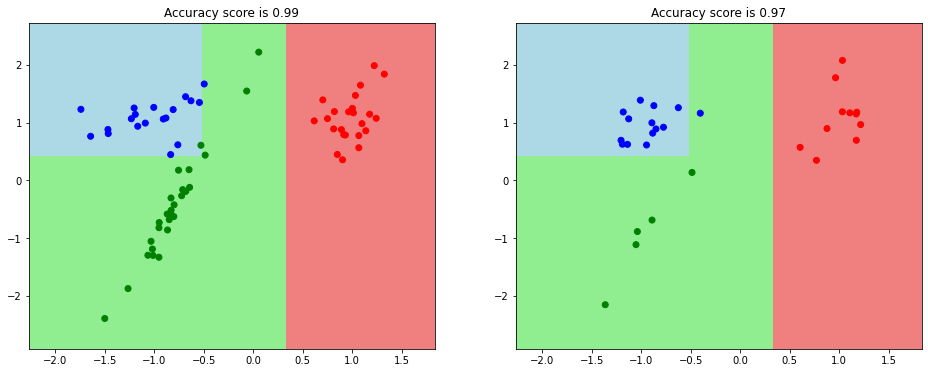

In [131]:
clf = tree.DecisionTreeClassifier(random_state=1, min_samples_leaf=3)
plot_decision_surface(clf, train_X, train_y, test_X, test_y)

# RandomForest

In [27]:
from sklearn import ensemble, model_selection, metrics
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [4]:
df = pd.read_csv('bioresponse.csv')
df.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.shape

(3751, 1777)

In [11]:
df.isnull().any().any()

False

In [12]:
target = df.iloc[:, 0]

In [16]:
(target == 1).sum() / len(target), (target == 0).sum() / len(target)

(0.5422553985603839, 0.4577446014396161)

In [17]:
data = df.iloc[:, 1:]

In [19]:
clf = ensemble.RandomForestClassifier(n_estimators=50, max_depth=2, random_state=1)

In [22]:
train_sizes, train_scores, test_scores = model_selection.learning_curve(clf, data, target, train_sizes=np.arange(0.1, 1, 0.2), 
                                                                       scoring='accuracy', cv=3)

In [25]:
train_mean_scores = train_scores.mean(axis=1)
test_mean_scores = test_scores.mean(axis=1)

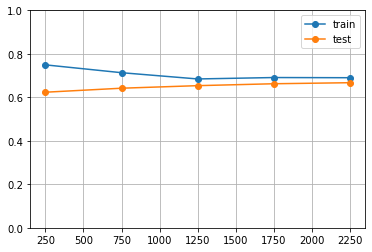

In [36]:
plt.plot(train_sizes, train_mean_scores, '-o', train_sizes, test_mean_scores, '-o')
plt.grid()
plt.ylim(0, 1)
plt.legend(['train', 'test'])

In [43]:
clf_b = ensemble.RandomForestClassifier(n_estimators=50, max_depth=10, random_state=1)
train_sizes, train_scores, test_scores = model_selection.learning_curve(clf_b, data, target,
                                                                       train_sizes=np.arange(0.1, 1, 0.2), 
                                                                       cv=3, scoring='accuracy')
train_mean_scores = train_scores.mean(axis=1)
test_mean_scores = test_scores.mean(axis=1)

(0.0, 1.05)

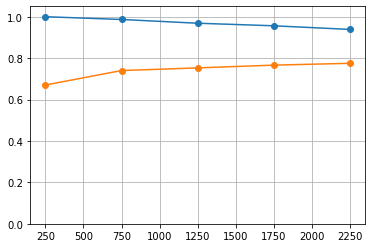

In [44]:
plt.plot(train_sizes, train_mean_scores, '-o', train_sizes, test_mean_scores, '-o')
plt.grid()
plt.ylim(0, 1.05)